[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dsokulski/log_likelihood/blob/main/log_likelihood.ipynb)  
200 events were measured in the electron scattering experiment. Assuming that the
expected distribution corresponds to the Cauchy distribution:  
\begin{equation*}
    p(x; a) = \frac{a}{\pi} \cdot \frac{1}{1 + (ax)^2}
\end{equation*}
  
use the unbinned likelihood method to extract value of parameter a.

We can write the formula for log likelihood:  
\begin{equation*}
     ℓ = \sum_{i=1}^{N} \ln{p(x_i;a)} = \sum_{i=1}^{N} (\ln{a} - \ln{[1+(ax_i)^2]} - \ln{\pi}) = N \ln{a} - N \ln{\pi} - \sum_{i=1}^{N} \ln{[1+(ax_i)^2]} 
\end{equation*}

Then the we maximize it:  
\begin{equation*}
    \frac{\partial ℓ}{\partial a} = \frac{N}{a} - \sum_{i=1}^{N} \frac{2ax_i^2}{1+(ax_i)^2} = 0     
\end{equation*}  

This can't be solved analytically, so we find a numerical solution, using a bisection method of finding a root of a function that changes sign, as this is true in this case

In [7]:
from scipy.optimize import bisect
import numpy as np
import matplotlib.pyplot as plt

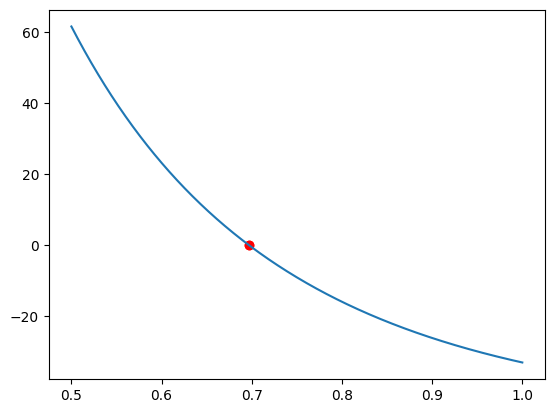

In [31]:
x = np.loadtxt('data.txt')

def dl_da(a):
    return len(x) / a - np.sum((2 * a * x**2) / (1 + (a * x)**2))


X = np.linspace(0.5, 1, 1000)
Y = np.vectorize(dl_da)(X)

delta = 0.1
plt.plot(X, Y)
plt.scatter(X[np.logical_and(Y>-delta, Y<delta)], Y[np.logical_and(Y>-delta, Y<delta)], color='red')

In [22]:
a = bisect(dl_da, 0.5, 1)
print(f"Value of the parameter a is {np.round(a, 3)}")

Value of the parameter a is 0.697
